In [1]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
X, y = load_iris(return_X_y=True)
X.shape

(150, 4)

In [2]:
X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(150, 1)

In [3]:
X_new

array([[1.4],
       [1.4],
       [1.3],
       [1.5],
       [1.4],
       [1.7],
       [1.4],
       [1.5],
       [1.4],
       [1.5],
       [1.5],
       [1.6],
       [1.4],
       [1.1],
       [1.2],
       [1.5],
       [1.3],
       [1.4],
       [1.7],
       [1.5],
       [1.7],
       [1.5],
       [1. ],
       [1.7],
       [1.9],
       [1.6],
       [1.6],
       [1.5],
       [1.4],
       [1.6],
       [1.6],
       [1.5],
       [1.5],
       [1.4],
       [1.5],
       [1.2],
       [1.3],
       [1.4],
       [1.3],
       [1.5],
       [1.3],
       [1.3],
       [1.3],
       [1.6],
       [1.9],
       [1.4],
       [1.6],
       [1.4],
       [1.5],
       [1.4],
       [4.7],
       [4.5],
       [4.9],
       [4. ],
       [4.6],
       [4.5],
       [4.7],
       [3.3],
       [4.6],
       [3.9],
       [3.5],
       [4.2],
       [4. ],
       [4.7],
       [3.6],
       [4.4],
       [4.5],
       [4.1],
       [4.5],
       [3.9],
       [4.8],
      

In [4]:
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2

In [5]:
X, y = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [6]:
X_new = SelectKBest(chi2, k=20).fit_transform(X, y)
X_new.shape

(1797, 20)

In [7]:
from sklearn.datasets import load_digits
digits = load_digits()
X, y = digits.data, digits.target

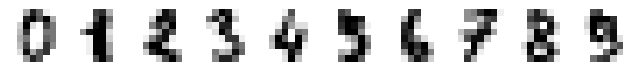

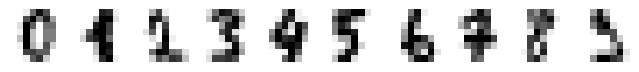

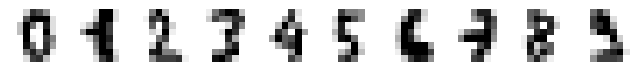

In [8]:
import matplotlib.pyplot as plt
N = 30
nrows = (N//10)

for row in range(nrows):
    plt.figure(figsize=(8,8))
    for i in range(10):
        plt.subplot(1, 10, i+1)
        plt.imshow(digits.images[i + row*10], cmap=plt.cm.gray_r,
                    interpolation='nearest')
        plt.axis('off')
    plt.show()

In [9]:
from sklearn.svm import SVC
model = SVC().fit(X, y)
model

SVC()

In [10]:
model.score(X, y)

0.996661101836394

In [11]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96111111, 0.94444444, 0.98328691, 0.98885794, 0.93871866])

In [12]:
import numpy as np
param_range = np.logspace(-6, -1, 10)

In [13]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=-1)

CPU times: total: 312 ms
Wall time: 7.96 s


In [14]:
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

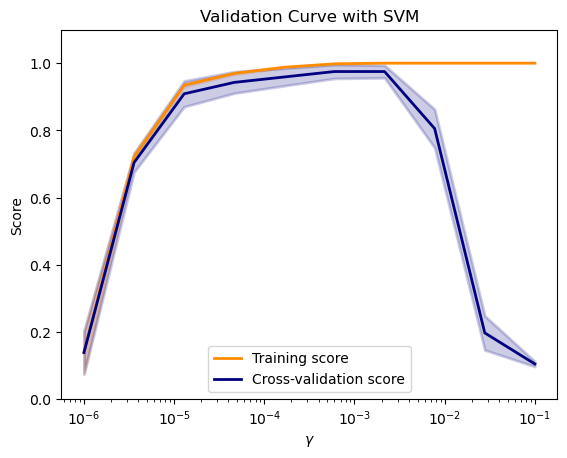

In [15]:
import matplotlib.pyplot as plt
plt.title("Validation Curve with SVM")
plt.xlabel("$\gamma$")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(param_range, train_scores_mean, label="Training score",
             color="darkorange", lw=2)
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=2)
plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
             color="navy", lw=2)
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=2)
plt.legend(loc="best")
plt.show()

In [16]:
gamma = param_range[test_scores_mean.argmax()]
from sklearn.svm import SVC
model = SVC(gamma=gamma).fit(X, y)

In [17]:
from sklearn.model_selection import cross_val_score
np.mean(cross_val_score(model, X, y, cv=5))

0.9655137728257506

In [18]:
! pip install xgboost

In [19]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [20]:
grid = GridSearchCV(estimator=XGBClassifier(),
                    param_grid={'max_depth':[3, 5, 7, 9],
                                'subsample':[0.4, 0.6, 0.8, 1.0]})
grid.fit(X, y)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [3, 5, 7, 9],
                         'subsample': [0.4, 0.6, 0.8, 1.0]})

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest

import pandas as pd
redwine = pd.read_csv("winequality-red.csv", sep=";")
redwine_X, redwine_y = redwine.iloc[:, :-1], redwine.iloc[:, -1]

In [22]:
selection = SelectKBest(k=1)
svm = SVC(kernel="linear")
pipeline = Pipeline([("univ_select", selection), ("svm", svm)])
param_grid = dict(univ_select__k=[4,5,6,7,8,9,10,11],
                  svm__C=[0.1, 1, 10])
grid_search = GridSearchCV(pipeline, param_grid=param_grid,
                           cv=2, verbose=10)
grid_search.fit(redwine_X, redwine_y)

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV 1/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 1/2; 1/24] END svm__C=0.1, univ_select__k=4;, score=0.516 total time=   0.0s
[CV 2/2; 1/24] START svm__C=0.1, univ_select__k=4...............................
[CV 2/2; 1/24] END svm__C=0.1, univ_select__k=4;, score=0.584 total time=   0.0s
[CV 1/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 1/2; 2/24] END svm__C=0.1, univ_select__k=5;, score=0.516 total time=   0.0s
[CV 2/2; 2/24] START svm__C=0.1, univ_select__k=5...............................
[CV 2/2; 2/24] END svm__C=0.1, univ_select__k=5;, score=0.589 total time=   0.0s
[CV 1/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 1/2; 3/24] END svm__C=0.1, univ_select__k=6;, score=0.519 total time=   0.1s
[CV 2/2; 3/24] START svm__C=0.1, univ_select__k=6...............................
[CV 2/2; 3/24] END svm__C=0.1, univ_select__k=6;

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('univ_select', SelectKBest(k=1)),
                                       ('svm', SVC(kernel='linear'))]),
             param_grid={'svm__C': [0.1, 1, 10],
                         'univ_select__k': [4, 5, 6, 7, 8, 9, 10, 11]},
             verbose=10)

In [23]:
print(grid_search.best_estimator_)

Pipeline(steps=[('univ_select', SelectKBest(k=9)),
                ('svm', SVC(C=1, kernel='linear'))])


In [24]:
grid_search.best_params_

{'svm__C': 1, 'univ_select__k': 9}

In [25]:
grid_search.score(redwine_X, redwine_y)

0.5878674171357098

In [26]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest

In [27]:
iris = load_iris()
iris_X, iris_y = iris.data, iris.target

In [28]:
pca = PCA(n_components=2)
selection = SelectKBest(k=1)
combined_features = FeatureUnion([("pca", pca),
                                  ("univ_select", selection)])
X_features = combined_features.fit(iris_X, iris_y).transform(iris_X)
svm = SVC(kernel="linear")

In [29]:
pipeline = Pipeline([("features", combined_features), ("svm", svm)])
param_grid = dict(features__pca__n_components=[1,2,3],
                  features__univ_select__k=[1,2],
                  svm__C=[0.1, 1, 10])

In [30]:
grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=10)
grid_search.fit(iris_X, iris_y)
print(grid_search.best_estimator_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 1/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.933 total time=   0.0s
[CV 2/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 2/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.933 total time=   0.0s
[CV 3/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 3/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.867 total time=   0.0s
[CV 4/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1
[CV 4/5; 1/18] END features__pca__n_components=1, features__univ_select__k=1, svm__C=0.1;, score=0.933 total time=   0.0s
[CV 5/5; 1/18] START features__pca__n_components=1, features__univ_select__k=1, svm__C=

In [31]:
grid_search.score(iris_X, iris_y)

0.9733333333333334

In [32]:
pred = grid_search.predict(iris_X)

In [33]:
import pandas as pd
pd.crosstab(iris_y, pred,
            rownames=['True'], colnames=['Pred'], margins=True)

Pred,0,1,2,All
True,,,,
0,50,0,0,50
1,0,46,4,50
2,0,0,50,50
All,50,46,54,150


베이지안

In [34]:
! pip install bayesian-optimization

   ---------------------------------------- 0.0/301.8 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.8 kB 660.6 kB/s eta 0:00:01
   ---------------------------------------- 301.8/301.8 kB 4.7 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [35]:
from bayes_opt import BayesianOptimization
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
import numpy as np

In [36]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris_X = iris.iloc[:, :-1]
iris_y = iris.iloc[:, -1]

In [37]:
def svc_crossval(C):
    model = SVC(C=C, random_state=42)
    # model.fit(iris_X, iris_y)
    # return model.score()
    cv_score = cross_val_score(model, iris_X, iris_y, cv=5)
    return np.mean(cv_score)

In [38]:
bo = BayesianOptimization(f=svc_crossval, pbounds={'C': (0.001, 100)},
                            random_state=42, verbose=2)
bo.maximize(init_points=10, #초기 임의 탐색횟수
            n_iter=30)      # 베이지안 최적화 반복횟수

|   iter    |  target   |     C     |
-------------------------------------
| 1         | 0.9733    | 37.45     |
| 2         | 0.9733    | 95.07     |
| 3         | 0.9733    | 73.2      |
| 4         | 0.9733    | 59.87     |
| 5         | 0.98      | 15.6      |
| 6         | 0.98      | 15.6      |
| 7         | 0.9867    | 5.809     |
| 8         | 0.9733    | 86.62     |
| 9         | 0.9733    | 60.11     |
| 10        | 0.9733    | 70.81     |
| 11        | 0.9267    | 0.001     |
| 12        | 0.98      | 9.29      |
| 13        | 0.98      | 21.51     |
| 14        | 0.9733    | 27.02     |
| 15        | 0.9733    | 47.66     |
| 16        | 0.9733    | 80.01     |
| 17        | 0.9733    | 53.38     |
| 18        | 0.9733    | 99.99     |
| 19        | 0.9733    | 42.55     |
| 20        | 0.9733    | 32.29     |
| 21        | 0.9733    | 65.73     |
| 22        | 0.98      | 18.71     |
| 23        | 0.9733    | 90.83     |
| 24        | 0.9867    | 7.197     |
| 25        

In [39]:
from sklearn.model_selection import ParameterGrid

param_grid = {'a': [1, 2], 'b': [True, False]}
grid = ParameterGrid(param_grid)
grid

In [40]:
grid

In [41]:
list(grid)

[{'a': 1, 'b': True},
 {'a': 1, 'b': False},
 {'a': 2, 'b': True},
 {'a': 2, 'b': False}]

In [42]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=1)

CPU times: total: 43.7 s
Wall time: 43.1 s


In [43]:
%%time
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
train_scores, test_scores = validation_curve(
    SVC(), X, y, param_name="gamma", param_range=param_range,
    cv=10, scoring="accuracy", n_jobs=4)

TerminatedWorkerError: A worker process managed by the executor was unexpectedly terminated. This could be caused by a segmentation fault while calling the function or by an excessive memory usage causing the Operating System to kill the worker.


In [44]:
%%time
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2
pipe = Pipeline([
    ('reduce_dim', None),
    ('classify', LinearSVC())
])

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components' : N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']
grid = GridSearchCV(pipe, cv=5, n_jobs=-1, param_grid=param_grid)
digits = load_digits()
grid.fit(digits.data, digits.target)

exception calling callback for <Future at 0x20c2af30710 state=finished raised TerminatedWorkerError>
Traceback (most recent call last):
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\joblib\parallel.py", line 359, in __call__
    *,
       
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    return outcome['status'] != TASK_ERROR
            ^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    now = time.time()
              ^^^^^^^^
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    idle_worker_timeout=300, **memmappingexecutor_args):
    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\IPython\core\magics\execution.py", line 1345, in time
    out = eval(code_2, glob, local_ns)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<timed exec>", line 29, in <module>
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py", line 874, in fit
    self._run_search(evaluate_candidates)
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py", line 1388, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\model_selection\_search.py", line 821, in evaluate_candidates
    out = parallel(
          ^^^^^^^^^
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\utils\parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\KOSA\anaconda3\Lib\site-packages\joblib\parallel

In [45]:
import matplotlib.pyplot as plt

mean_scores = np.array(grid.cv_results_['mean_test_score'])
mean_scores = mean_scores.reshape(len(C_OPTIONS), -1,
                                  len(N_FEATURES_OPTIONS))
mean_scores = mean_scores.max(axis=0)
bar_offsets = (np.arange(len(N_FEATURES_OPTIONS)) * 
               (len(reducer_labels) + 1) + .5)

plt.figure()
COLORS = 'bgrcmyk'
for i, (label, reducer_scores) in enumerate(zip(reducer_labels, mean_scores)):
    plt.bar(bar_offsets + i, reducer_scores, label=label, color=COLORS[i])

plt.title("Comparing feature reduction techniques")
plt.xlabel('Reduced number of features')
plt.xticks(bar_offsets + len(reducer_labels) / 2, N_FEATURES_OPTIONS)
plt.ylabel('Digit classification accuracy')
plt.ylim((0, 1))
plt.legend(loc='upper left')
plt.show()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'

In [47]:
! pip install joblib==1.1.0

  Using cached joblib-1.1.0-py2.py3-none-any.whl.metadata (5.2 kB)
Using cached joblib-1.1.0-py2.py3-none-any.whl (306 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.4.2
    Uninstalling joblib-1.4.2:
      Successfully uninstalled joblib-1.4.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.11.0 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.
scikit-learn 1.2.2 requires joblib>=1.1.1, but you have joblib 1.1.0 which is incompatible.


In [48]:
%%time
from sklearn.datasets import load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA, NMF
from sklearn.feature_selection import SelectKBest, chi2
from tempfile import mkdtemp
from shutil import rmtree
from joblib import Memory

cachedir = mkdtemp()
memory = Memory(cachedir=cachedir)
pipe = Pipeline([('reduce_dim', None), ('classify', LinearSVC())],
                memory=memory)

N_FEATURES_OPTIONS = [2, 4, 8]
C_OPTIONS = [1, 10, 100, 1000]
param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7), NMF()],
        'reduce_dim__n_components' : N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
    {
        'reduce_dim': [SelectKBest(chi2)],
        'reduce_dim__k': N_FEATURES_OPTIONS,
        'classify__C': C_OPTIONS
    },
]
reducer_labels = ['PCA', 'NMF', 'KBest(chi2)']
grid = GridSearchCV(pipe, cv=5, n_jobs=-1, param_grid=param_grid)
digits = load_digits()
grid.fit(digits.data, digits.target)

rmtree(cachedir)

<timed exec>:12: DeprecationWarning: The 'cachedir' parameter has been deprecated in version 0.12 and will be removed in version 0.14.
You provided "cachedir='C:\\Users\\KOSA\\AppData\\Local\\Temp\\tmp1inbmykn'", use "location='C:\\Users\\KOSA\\AppData\\Local\\Temp\\tmp1inbmykn'" instead.


________________________________________________________________________________
[Memory] Calling sklearn.pipeline._fit_transform_one...
_fit_transform_one(PCA(iterated_power=7, n_components=8), array([[0., ..., 0.],
       ...,
       [0., ..., 0.]]), array([0, ..., 8]), None, message_clsname='Pipeline', message=None)
________________________________________________fit_transform_one - 0.0s, 0.0min
CPU times: total: 1.83 s
Wall time: 5.96 s


C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [49]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5,
                           n_redundant=0, n_clusters_per_class=1,
                           n_classes=2, weights=[0.99, 0.01],
                           random_state=42)

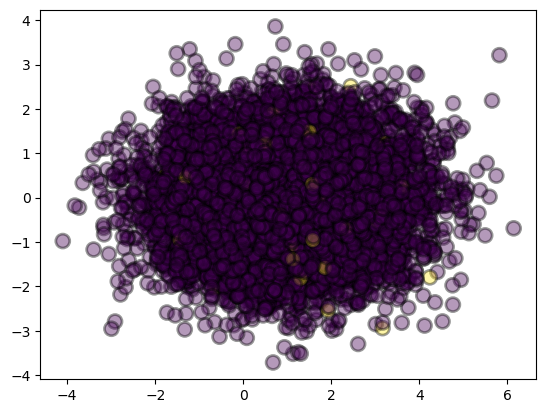

In [50]:
plt.scatter(x=X[:,0], y=X[:,1], marker='o', c=y,
            s=100, edgecolor="k", linewidth=2, alpha=0.4)
plt.show()

In [51]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=2, random_state=42)

In [53]:
rfc_pred = rf_model.predict(test_X)

In [54]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, rfc_pred)

array([[2960,    0],
       [  36,    4]], dtype=int64)

In [55]:
from sklearn.metrics import classification_report
print(classification_report(test_y, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2960
           1       1.00      0.10      0.18        40

    accuracy                           0.99      3000
   macro avg       0.99      0.55      0.59      3000
weighted avg       0.99      0.99      0.98      3000



In [56]:
! pip install imblearn

  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [57]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_resampled, y_resampled = sm.fit_resample(X, y)

In [58]:
X_resampled.shape, y_resampled.shape

((19720, 10), (19720,))

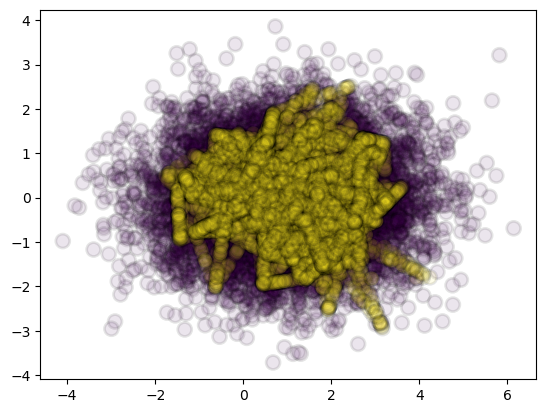

In [59]:
plt.scatter(x=X_resampled[:, 0], y=X_resampled[:, 1],
            marker='o', c=y_resampled,
            s=100, edgecolors="k", linewidths=2, alpha=0.1)
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X_resampled, y_resampled, test_size=0.3, shuffle=True, random_state=42)
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((13804, 10), (5916, 10), (13804,), (5916,))

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2,
                                  random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(max_features=2, random_state=42)

In [62]:
pred = rf_model.predict(test_X)
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, pred)

array([[2964,    4],
       [  27, 2921]], dtype=int64)

In [63]:
from sklearn.metrics import classification_report
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2968
           1       1.00      0.99      0.99      2948

    accuracy                           0.99      5916
   macro avg       0.99      0.99      0.99      5916
weighted avg       0.99      0.99      0.99      5916



In [64]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5,
                           n_redundant=0, n_clusters_per_class=1,
                           n_classes=2, weights=[0.99, 0.01],
                           random_state=42)

In [65]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

In [66]:
from imblearn.over_sampling import SMOTE
sm = SMOTE()
resampled_X, resampled_y = sm.fit_resample(train_X, train_y)
resampled_X.shape, resampled_y.shape

((13804, 10), (13804,))

In [67]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2, random_state=42)
rf_model.fit(resampled_X, resampled_y)

RandomForestClassifier(max_features=2, random_state=42)

In [68]:
pred = rf_model.predict(test_X)
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(test_y, pred)

array([[2955,    3],
       [  27,   15]], dtype=int64)

In [69]:
print(classification_report(test_y, pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       0.83      0.36      0.50        42

    accuracy                           0.99      3000
   macro avg       0.91      0.68      0.75      3000
weighted avg       0.99      0.99      0.99      3000



In [70]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000, n_features=10, n_informative=5,
                           n_redundant=0, n_clusters_per_class=1,
                           n_classes=2, weights=[0.99, 0.01],
                           random_state=42)

In [71]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.3,
                                                    stratify=y, random_state=42)

In [72]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, max_features=2,
                                  class_weight={0:1, 1:1.4},
                                  random_state=42)
rf_model.fit(train_X, train_y)

RandomForestClassifier(class_weight={0: 1, 1: 1.4}, max_features=2,
                       random_state=42)

In [73]:
rfc_pred = rf_model.predict(test_X)
from sklearn.metrics import classification_report
print(classification_report(test_y, rfc_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2958
           1       1.00      0.21      0.35        42

    accuracy                           0.99      3000
   macro avg       0.99      0.61      0.67      3000
weighted avg       0.99      0.99      0.99      3000



In [74]:
import numpy as np

In [75]:
N = 1000000
bootstrap = np.random.choice(N, N, replace=True)
np.round(len(set(bootstrap))/N, 3)

0.632

In [76]:
import pandas as pd
wine_df = pd.read_csv("https://archive.ics.uci.edu"
                      "/ml/machine-learning-databases/wine/wine.data",
                      header=None)

In [77]:
wine_df.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols',
                   'Proanthocyanins', 'Color intensity', 'Hue',
                   'OD280/OD315 of diluted wines', 'Proline']

In [78]:
wine_df.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [79]:
wine_df = wine_df[wine_df['Class label'] != 1]
X = wine_df[["Alcohol", "Hue"]].values
y = wine_df["Class label"].values

In [80]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [81]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.4, random_state=1)
train_y, test_y

(array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
        1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 1, 0], dtype=int64),
 array([1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
        0, 1, 1, 1], dtype=int64))

In [83]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion='entropy', max_depth=None,
                               random_state=1)
tree.fit(train_X, train_y)

DecisionTreeClassifier(criterion='entropy', random_state=1)

In [84]:
tree.score(test_X, test_y)

0.8333333333333334

In [85]:
from sklearn.ensemble import BaggingClassifier

bag = BaggingClassifier(base_estimator=tree, n_estimators=500,
                        bootstrap=True, bootstrap_features=False,
                        random_state=1)

In [86]:
bag.fit(train_X, train_y)

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                        random_state=1),
                  n_estimators=500, random_state=1)

In [87]:
bag.score(test_X, test_y)

0.8958333333333334

In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(train_X, train_y)

RandomForestClassifier()

In [89]:
rf.score(test_X, test_y)

0.9166666666666666

In [90]:
import numpy as np

x_min, x_max = train_X[:, 0].min()-1, train_X[:, 0].max()+1
y_min, y_max = train_X[:, 1].min()-1, train_X[:, 1].max()+1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

C:\Users\KOSA\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


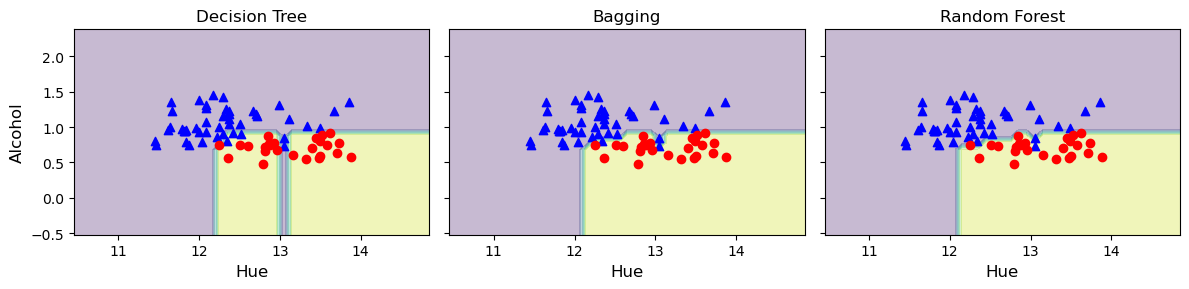

In [92]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=3, sharex='col', sharey='row', figsize=(12,3))

model_info = zip([0, 1, 2],
                 [tree, bag, rf],
                 ['Decision Tree', 'Bagging', 'Random Forest'])

for idx, model, title_txt in model_info :
    model.fit(train_X, train_y)
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    axes[idx].contourf(xx, yy, Z, alpha=0.3)
    axes[idx].scatter(train_X[train_y==0, 0], train_X[train_y==0, 1],
    c='blue', marker='^')
    axes[idx].scatter(train_X[train_y==1, 0], train_X[train_y==1, 1],
    c='red', marker='o')
    axes[idx].set_title(title_txt)
    axes[idx].set_xlabel('Hue', fontsize=12)

axes[0].set_ylabel('Alcohol', fontsize=12)
plt.tight_layout()
plt.show()